<a href="https://colab.research.google.com/github/t6nand/mltasks/blob/master/MLCommEx1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

cost: 3.362
Cost:0.874386
mean:0.414, stdd:0.248
Cost:0.874386
[[0.4138 ]
 [0.23271]
 [0.14481]
 [0.09487]]
[[0.24795]
 [0.20178]
 [0.15376]
 [0.11727]]
Cost:6.711965
[[ 0.81526]
 [10.44346]
 [11.15544]
 [11.05384]
 [10.63789]]
Cost:0.030581


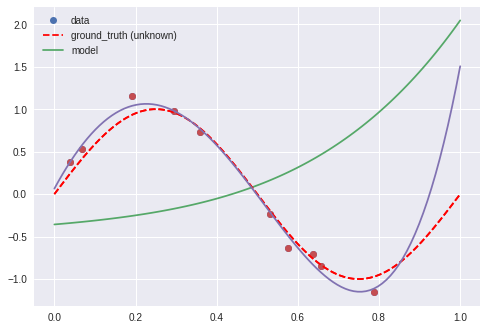

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from dataset1_linreg import DataSet

predicted_op = 0
learning_rate = 0.01
update_iterations = 20000
#import data, plot data
y_D, x_D = DataSet.get_data()
#DataSet.plot_data()
w = np.array([0.1, 0.1]).reshape((-1,1))

#Predict Outputs from inputs using weights and bias terms
def predict_y1(x_arr):
  a = w[1][0] * x_arr + w[0][0]
  return a 

#DataSet.plot_model(predict_y1)

def l2_cost(x_arr, y_arr, predict_f):
    a = predict_f(x_arr)
    cost = 0.5 * np.sum((a - y_arr)**2)
    return cost
  
print('cost: %.3f' % l2_cost(x_D, y_D, predict_y1))  

x_Train = np.vstack((np.ones((1,x_D.shape[1])), x_D))
for i in range(update_iterations):
  a = predict_y1(x_D)
  grad_w = x_Train.dot((a - y_D).T)
  w = w - learning_rate * grad_w

#DataSet.plot_model(predict_y1)
print('Cost:%f' % l2_cost(x_D, y_D, predict_y1))

def get_norm_params(x_data):
  mean_x = np.mean(x_data, axis=1).reshape((-1,1))
  stdd_x = np.std(x_data, axis=1).reshape((-1,1))
  return mean_x, stdd_x

x_D_mean, x_D_stdd = get_norm_params(x_D)
print('mean:%.3f, stdd:%.3f' % (x_D_mean, x_D_stdd))

#Predict Outputs from inputs using weights and bias terms
def predict_y1n(x_arr):
  x_arr = (x_arr - x_D_mean) / x_D_stdd
  a = w[1][0] * x_arr + w[0][0]
  return a 

w = np.array([0.1, 0.1]).reshape((-1,1))
x_train = (x_D - x_D_mean)/x_D_stdd
x_train = np.vstack( (np.ones((1,x_train.shape[1])), x_train) )
a = predict_y1n(x_D)
grad_w_initial = x_train.dot( (a - y_D).T )

for i in range(update_iterations):
  a = predict_y1n(x_D)
  grad_w = x_train.dot( (a-y_D).T )
  if (grad_w[0] == 0) and (grad_w[1] == 0) :
    break
  else:  
    w = w - (learning_rate * grad_w)

def l2_cost_n(x_arr, y_arr, predict_f):
    predicted_op = predict_y1n(x_arr)
    cost = 0.5 * np.sum((predicted_op - y_arr)**2)
    return cost
  
#DataSet.plot_model(predict_y1n)
print('Cost:%f' % l2_cost_n(x_D, y_D, predict_y1n))

def extend_data1D(x, p=1): 
    x_ext = np.vstack( [x**i for i in range(1,p+1)] ) 
    return x_ext

P = 4
x_D_ext = extend_data1D(x_D, P)
x_D_ext_mean, x_D_ext_stdd = get_norm_params(x_D_ext)

print(x_D_ext_mean)
print(x_D_ext_stdd)

def predict_y2(x):
    x = extend_data1D(x, P)
    x = (x-x_D_ext_mean)/x_D_ext_stdd
    a = w[0][0] + w[1:].T.dot(x)
    return a

w = np.array([0.1]*(P+1)).reshape(-1,1)

DataSet.plot_model(predict_y2)
print('Cost:%f' % l2_cost(x_D, y_D, predict_y2))
x_train = extend_data1D(x_D,P) 
x_train = (x_train - x_D_ext_mean)/x_D_ext_stdd
x_train = np.vstack( (np.ones((1,x_train.shape[1])), x_train) )
a = predict_y2(x_D)
grad_w_initial = x_train.dot( (a - y_D).T )
print(grad_w_initial)

for i in range(update_iterations):
  a = predict_y2(x_D)
  grad_w = x_train.dot( (a-y_D).T )
  w = w - (learning_rate * grad_w)
  
DataSet.plot_model(predict_y2)
print('Cost:%f' % l2_cost(x_D, y_D, predict_y2))